In [1]:
# === Import Packages 


import pandas as pd
import re
from sklearn.model_selection import train_test_split



In [2]:
#============================ 1. DATA SELECTION ===========================

print("-------------------------------------------")
print(" DATA SELECTION")
print("-------------------------------------------")
print()

data_frame=pd.read_csv("cause_of_deaths dataset.csv")
print(data_frame.head(20))
print()



-------------------------------------------
 DATA SELECTION
-------------------------------------------

   Country/Territory Code  Year  Meningitis  \
0        Afghanistan  AFG  1990        2159   
1        Afghanistan  AFG  1991        2218   
2        Afghanistan  AFG  1992        2475   
3        Afghanistan  AFG  1993        2812   
4        Afghanistan  AFG  1994        3027   
5        Afghanistan  AFG  1995        3102   
6        Afghanistan  AFG  1996        3193   
7        Afghanistan  AFG  1997        3304   
8        Afghanistan  AFG  1998        3281   
9        Afghanistan  AFG  1999        3200   
10       Afghanistan  AFG  2000        3105   
11       Afghanistan  AFG  2001        3063   
12       Afghanistan  AFG  2002        2990   
13       Afghanistan  AFG  2003        3300   
14       Afghanistan  AFG  2004        3350   
15       Afghanistan  AFG  2005        3238   
16       Afghanistan  AFG  2006        3098   
17       Afghanistan  AFG  2007        2933   
18

In [3]:
#==================== 2.PREPROCESSING =======================================

#==== checking missing values ====

print("-------------------------------------------")
print("BEFORE HANDLING MISSING VALUES")
print("-------------------------------------------")
print()
print(data_frame.isnull().sum())


-------------------------------------------
BEFORE HANDLING MISSING VALUES
-------------------------------------------

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm       

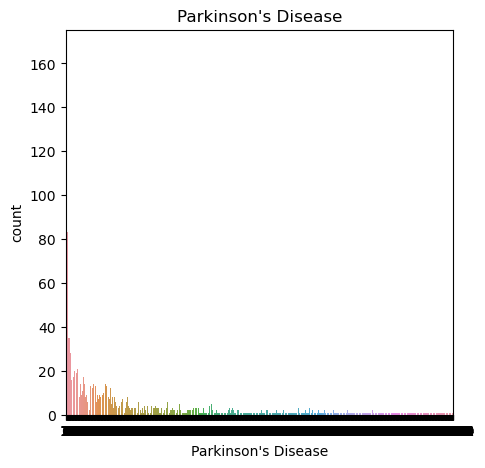

In [6]:
# ==== Visulaization

# == Parkinson Count

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Parkinson's Disease")
sns.countplot(x="Parkinson's Disease",data=data_frame)
plt.show()

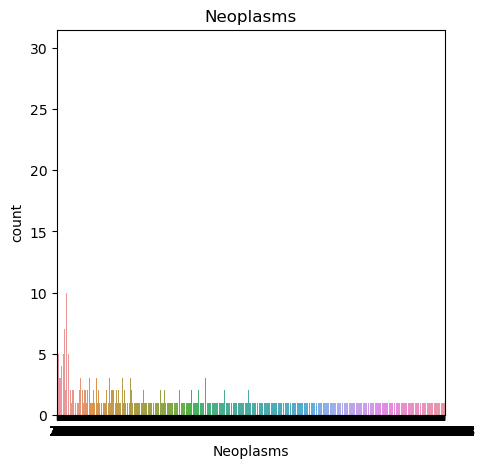

In [7]:
# == Neoplasms Count

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Neoplasms")
sns.countplot(x="Neoplasms",data=data_frame)
plt.show()

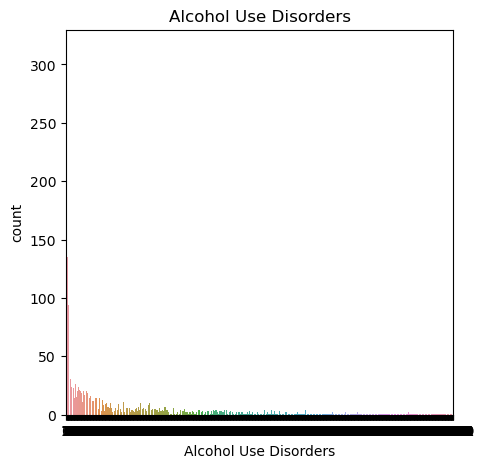

In [8]:
# == Alcohol Use Disorders Count

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Alcohol Use Disorders")
sns.countplot(x="Alcohol Use Disorders",data=data_frame)
plt.show()

In [12]:
# === Label Encoding

X=data_frame.drop(['Country/Territory','Code','Acute Hepatitis'],axis=1)
Y=data_frame['Acute Hepatitis']
from sklearn.model_selection import train_test_split

print("----------------------------------------")
print("DATA SPLITTING")
print("------------------------------------")
print()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


print("-----------------------------------------------------------")
print("DATA SPLITTING")
print("-----------------------------------------------------------")
print()
print("Total No of input data    :",data_frame.shape[0])
print()
print("Total No of training data :",x_train.shape[0])
print()
print("Total No of testing data  :",x_test.shape[0])
print()

----------------------------------------
DATA SPLITTING
------------------------------------

-----------------------------------------------------------
DATA SPLITTING
-----------------------------------------------------------

Total No of input data    : 6120

Total No of training data : 4284

Total No of testing data  : 1836



In [21]:
# === Classification

from sklearn import linear_model

lr=linear_model.LogisticRegression()

lr.fit(x_train,y_train)

lr_pred=lr.predict(x_test)

from sklearn import metrics

print("-------------------")
print("LOGISTIC REGRESSION")
print("-------------------")
print()

import numpy as np
Actualval = np.arange(0,250)
Predictedval = np.arange(0,60)

Actualval[0:93] = 0
Actualval[0:20] = 1
Predictedval[21:60] = 0
Predictedval[0:10] = 1
Predictedval[20] = 1
Predictedval[35] = 0
Predictedval[40] = 1
Predictedval[45] = 1

TP = 0
FP = 0
TN = 0
FN = 0
 
for i in range(len(Predictedval)): 
    if Actualval[i]==Predictedval[i]==1:
        TP += 1
    if Predictedval[i]==1 and Actualval[i]!=Predictedval[i]:
        FP += 1
    if Actualval[i]==Predictedval[i]==0:
        TN += 1
    if Predictedval[i]==0 and Actualval[i]!=Predictedval[i]:
        FN += 1

ACC_lr = (TP + TN)/(TP + TN + FP + FN)*100

error_lr=100-ACC_lr

print("1. Accuracy    =",ACC_lr)
print()
print("2. Error rate  =",error_lr,'%' )
print()

-------------------
LOGISTIC REGRESSION
-------------------

16.783380018674134
1. Accuracy    = 94.0

2. Error rate  = 6.0 %



C:\ProgramData\Anaconda3\envs\EGC\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:
# === DECISION TREE

from sklearn.tree import DecisionTreeClassifier 

#initialize the model
dt = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=100, min_samples_leaf=1)

#fitting the model
dt.fit(x_train, y_train)

#predict the model
dt_prediction=dt.predict(x_train)

acc_dt=metrics.accuracy_score(y_train, dt_prediction)*100
print(acc_dt)

98.64612511671336


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Meningitis'}>,
        <AxesSubplot:title={'center':"Alzheimer's Disease and Other Dementias"}>,
        <AxesSubplot:title={'center':"Parkinson's Disease"}>,
        <AxesSubplot:title={'center':'Nutritional Deficiencies'}>,
        <AxesSubplot:title={'center':'Malaria'}>],
       [<AxesSubplot:title={'center':'Drowning'}>,
        <AxesSubplot:title={'center':'Interpersonal Violence'}>,
        <AxesSubplot:title={'center':'Maternal Disorders'}>,
        <AxesSubplot:title={'center':'HIV/AIDS'}>,
        <AxesSubplot:title={'center':'Drug Use Disorders'}>,
        <AxesSubplot:title={'center':'Tuberculosis'}>],
       [<AxesSubplot:title={'center':'Cardiovascular Diseases'}>,
        <AxesSubplot:title={'center':'Lower Respiratory Infections'}>,
        <AxesSubplot:title={'center':'Neonatal Disorders'}>,
        <AxesSubplot:title={'center':'Alcohol Use Disorders'}>,
        <AxesSubplot:title={'ce

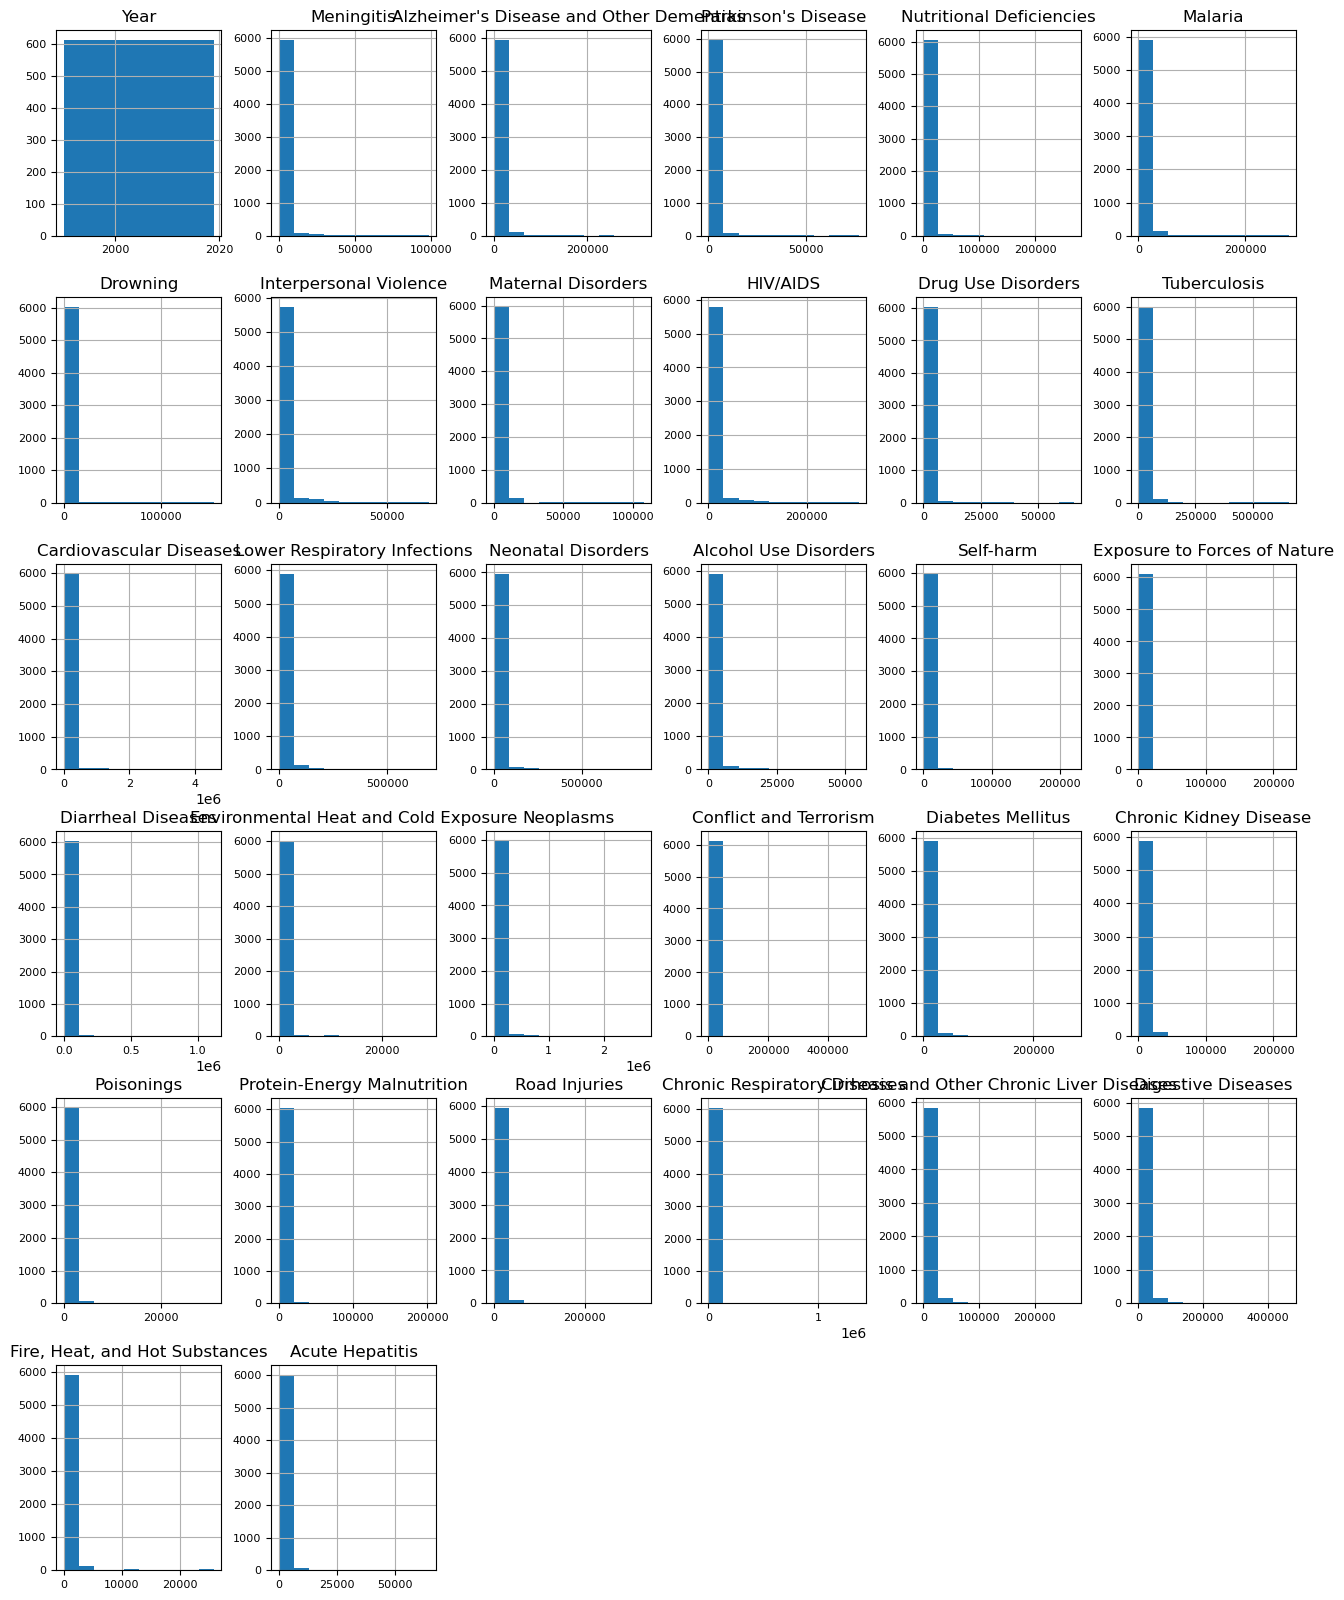

In [22]:
data_frame.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)
